# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [4]:
!python -m pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\amber\anaconda2\lib\site-packages


In [5]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [6]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


Variable | Summary | Description | Type of Variable | 
---| ---| --- | ---
admit | admitted to UCLA or not | 1 admitted, 0 not admitted | binary
GRE | Graduate Record Examinations - standarized test |integers - range from 200 - 800 | discrete*
GPA | Grade Point Average - summation rank of course grades  |floats with precision to the hundredths - range from 0.00 to 4.00 | continous
prestige | rank of undergraduates' university | integers 4 to 1 (highest)| ordinal

## Questions
#### Question 1. How many observations are in our dataset? 


In [7]:
df_raw.shape

(400, 4)

There are 400 records and a few records that have null values

In [8]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [9]:
#function
df_raw.describe()

C:\Users\Amber\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning:

Invalid value encountered in percentile



,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: <br/>
The standard deviaiton is a larger _number_ but that does not indicate anything. The values in the *GRE* column are larger. GRE values range from 200 to 800 where as GPA values range from 0.00 to 4.00<br/>
The _Relative Standard Deviation_ gives an idea of the Standard Deviation in respect to the mean <br/>
GRE is more distributed than GPA

Variable | Mean | Standard Deviation | Relative Standard Deviation | 
---| ---| --- | ---
GRE | 587.86 | 115.72 | 19.7%
GPA | 3.39 | 0.38 | 11.2%


#### Question 4. Drop data points with missing data


In [10]:
df = df_raw.dropna()
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: <br/>
As seen below in `.shape` of the two dataframes, only 3 records were lost in removing records with a null value with `.dropna()`

In [11]:
print df_raw.shape
print df.shape

(400, 4)
(397, 4)


Below with numpy using `np.where(df.column.isnull())[0]` indicates at which index the null values are <br/>
Index: 187, 212, and 236 all have null values. These three records line up with the same number of removed records in `.shape` above. <br/>

In [12]:
print "GRE null indicies",np.where(df_raw['gre'].isnull())[0]
print "GPA null indicies", np.where(df_raw['gpa'].isnull())[0]
print "Prestige null indicies", np.where(df_raw['prestige'].isnull())[0]

GRE null indicies [187 212]
GPA null indicies [187 236]
Prestige null indicies [236]


Furthermore, Below by printing the index where there are null records in the raw table and in the data frame with the dropped records one can see that the records with null values were indeed removed. 

In [13]:
print df_raw.loc[187]
print df_raw.loc[212]
print df_raw.loc[236]

admit       0.0
gre         NaN
gpa         NaN
prestige    2.0
Name: 187, dtype: float64
admit       0.00
gre          NaN
gpa         2.87
prestige    2.00
Name: 212, dtype: float64
admit         1.0
gre         660.0
gpa           NaN
prestige      NaN
Name: 236, dtype: float64


In [14]:
print df[df.index == 187]
print df[df.index == 212]
print df[df.index == 236]
# indexing this way instead as abve returns an empty index. Indexing as above on the data frame with the null 
# values removed returns an error message. so in this instance this way is useful.

Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []
Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []
Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []


#### Question 6. Create box plots for GRE and GPA

In [15]:
!pip install plotly

This notebook uses plotly as a dependancy to manipulate locally. https://plot.ly/python/getting-started/ <br/>
The embedded plots viewable. 

In [17]:
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go

In [18]:
data = [
    go.Box(
        x= df.gre,
        name = 'GRE',
        boxpoints='all',
        jitter=0.5,
        pointpos=0,
        marker = dict(
            color = 'rgb(199, 21, 133)',
        )
    )
]
py.iplot(data)

<div>
    <a href="https://plot.ly/~akell47/34/" target="_blank" title="GRE" style="display: block; text-align: center;"><img src="https://plot.ly/~akell47/34.png" alt="GRE" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="akell47:34"  src="https://plot.ly/embed.js" async></script>
</div>


In [19]:
data = [
    go.Box(
        x= df.gpa,
        name = 'GPA',
        boxpoints='all',
        jitter=0.5,
        pointpos=0,
        marker = dict(
            color = 'rgb(50, 30, 112)',
        )
    )
]
py.iplot(data)

<div>
    <a href="https://plot.ly/~akell47/50/" target="_blank" title="GPA" style="display: block; text-align: center;"><img src="https://plot.ly/~akell47/50.png" alt="GPA" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="akell47:50"  src="https://plot.ly/embed.js" async></script>
</div>


#### Question 7. What do this plots show?

Answer: <br/>
Box and Whisker Plots are a great way to visualize distribution of the data. The "box" is where most of the data lays. Specifically this is where data is with in the first and third quantilies of 25% and 75% respectively.  The ends "wiskers" show the range of the data.  Points outside of this range can be interperted as outliers. <br/>
These box plots also show the actual data points. Here you can see that GPA values are much more continuous compared to GRE. This box plot shows us that the GRE values are somewhat discrete by the tens.  

Variable | Interquartile Range (IQR) | Upper Limit (Q3)+1.5(IQR) | Lower Limit (Q1)-1.5(IQR)| Min or Max Outside IQR |  Outlier 
---| ---| --- | --- | --- | ----
GRE | 140 | 870 | 310 | 220 | yes
GPA | 1.41 | 5.79 | 1.01 | -- | no 

#### Question 8. Describe each distribution 

The box and wisker plots above demonstrate the distribution of the data, also described above in answer 7.

In [34]:
print "GPA Kurtosis", df.gpa.kurt()
print "GRE Kurtosis", df.gre.kurt()

GPA Kurtosis -0.563569899522
GRE Kurtosis -0.332864354651


Both GRE and GPA have negative kurtosis. A normal distrbution is equal to 0.  GRE is more normally distributed than GPA. GRE values are more centered around the mean and have less variance. 

In [36]:
print "GPA Skewness", df.gpa.skew()
print "GRE Skewness", df.gre.skew()

GPA Skewness -0.216888932969
GRE Skewness -0.146046988216


Both GRE and GPA are negatively skewed, meaning the mass of data is shifted to the right as seen below. GPA is slightly more skewed than GRE. There are more higher GPA scores. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E3387F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E68CF28>]], dtype=object)

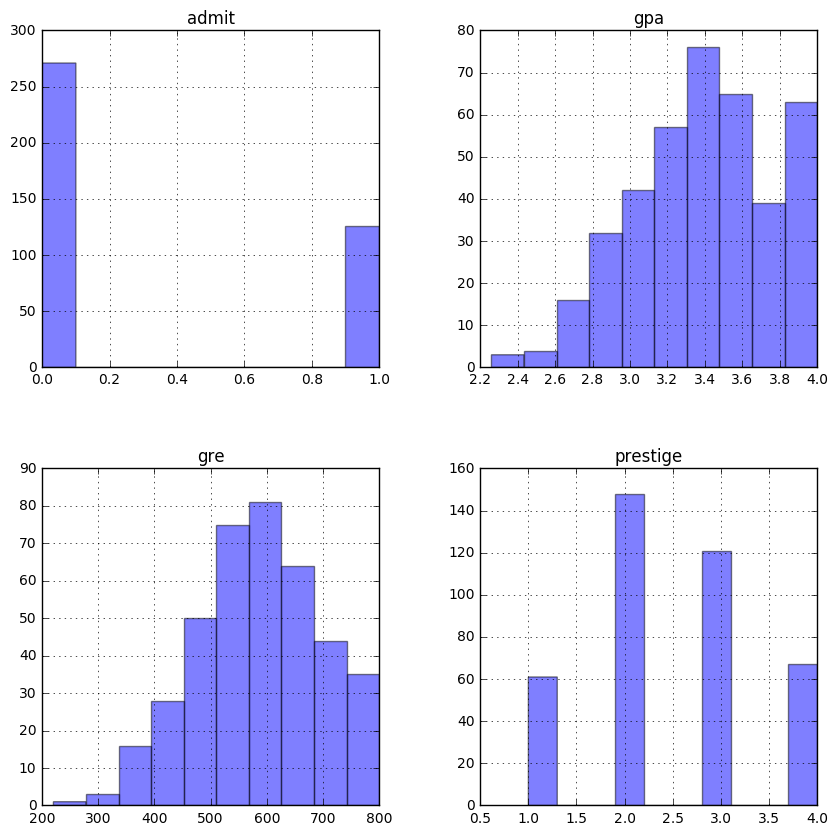

In [28]:
plt.figure()

df.hist(color=('b'), alpha=.5, bins=10, figsize = (10,10)) 

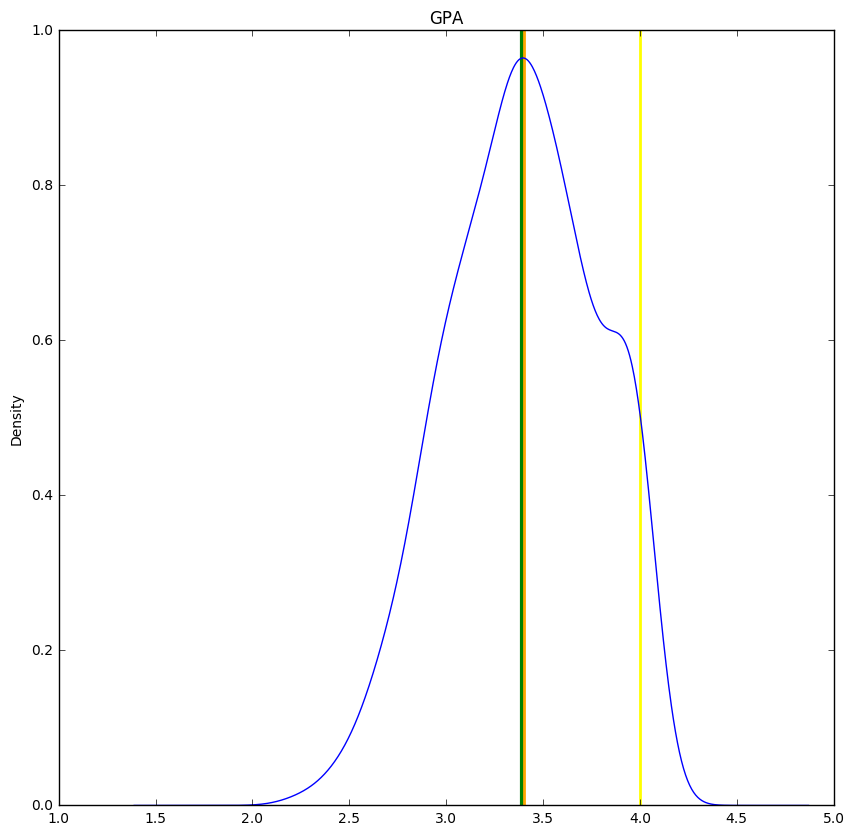

In [23]:
# plot the distribution of each variable 
plt.figure()
df.gpa.plot.kde(title = 'GPA', figsize = (10,10))

plt.vlines(df.gpa.mean(), ymin = 0, ymax = 1, linewidth = 3.0, color = 'green')
plt.vlines(df.gpa.median(), ymin = 0, ymax = 1, linewidth = 2.0, color = 'orange')
plt.vlines(df.gpa.mode(), ymin = 0, ymax = 1, linewidth = 2.0, color = 'yellow')

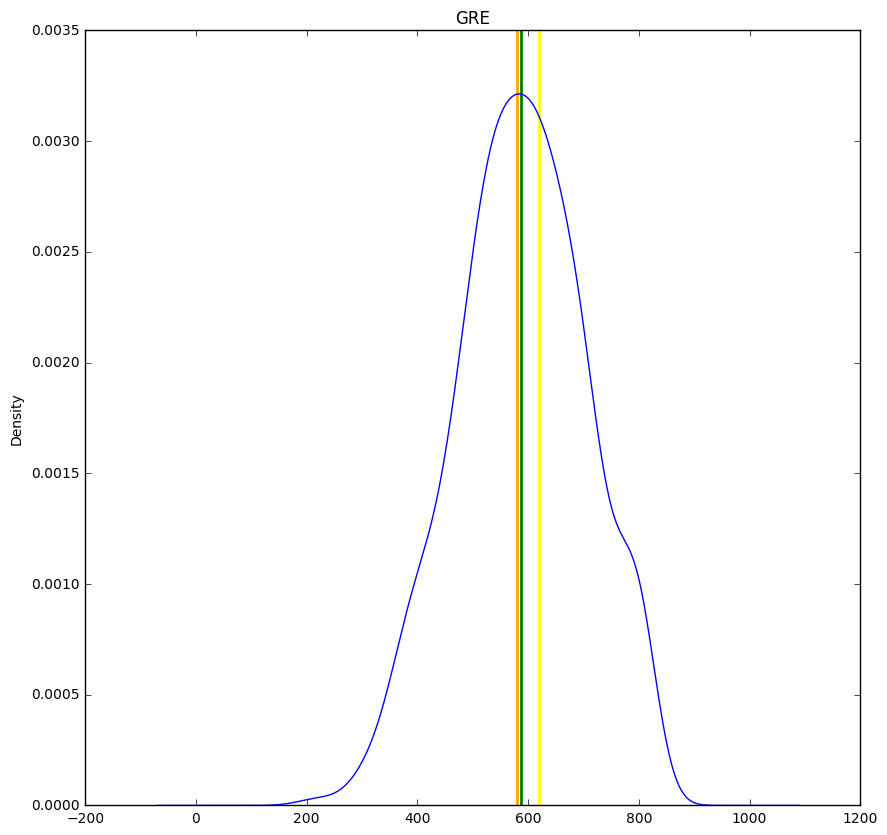

In [27]:
plt.figure()
df.gre.plot.kde(title = 'GRE', figsize = (10,10))

plt.vlines(df.gre.mean(), ymin = 0, ymax = 0.0035, linewidth = 2.0, color = 'green')
plt.vlines(df.gre.median(), ymin = 0, ymax = 0.0035, linewidth = 2.0, color = 'orange')
plt.vlines(df.gre.mode(), ymin = 0, ymax = 0.0035, linewidth = 2.0, color = 'yellow')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: <br/>
To meet normal distribution the mean = the median = the mode and the distribution would be symmetrical. Addationally under normal distribution, 95% of the data is within 2 standard deviations of the mean. 
The data is not normally distributed for the most part, but there is some skewness. GRE is more normally distributed than GPA and is more symmetrical.  Values of skewness between -0.5 and 0.5 are considered acceptable for normal distribution. 

https://help.gooddata.com/display/doc/Normality+Testing+-+Skewness+and+Kurtosis

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: <br/>
The data is skewed yes, but the data seems to be fairy distributed.  A standard procedure for skewed data is to do a natural log transformation. The data seems pretty normal though, not sure if correction is really needed. 
The linear regression of the logged data represents a percent change in in the dependent variable per percent change in the independent variable. In other words **%$ΔX$** predictead to lead to **%$ΔY$**

#### Question 11. Which of our variables are potentially colinear? 

In [39]:
# create a correlation matrix for the data
df[["gre", "gpa", "prestige"]].corr()

,gre,gpa,prestige
gre,1.000000,0.382408,-0.124533
gpa,0.382408,1.000000,-0.060976
prestige,-0.124533,-0.060976,1.000000


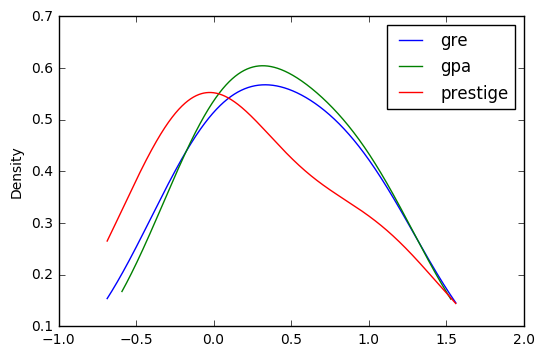

In [41]:
Correlation = df[["gre", "gpa", "prestige"]].corr()

plt.figure()
Correlation.plot.kde()

#### Question 12. What did you find?

Answer: **gpa** and **gre** express a weak positive correlation. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: <br/>
1. Explore the data how prestige relates to admissions rates
 * similar to above - check the summary staistics of prestige when admit = 1 and when admit = 0, obtain counts- groupby admissions and prestige.
2. Explore change in skewness and variance when admit = 1 and when admit = 0. 
 * `df.skew()` and `df.kurt()` for when admit = 1 or 0. 
 * create overlayed histograms and box plots of prestige as a whole, and the plots of prestige when admit = 0 or 1. Have these graphs on the same plot. 
3. possibly explore the relationship with logistic regression. Y, admittance rate is binary outcome.  

**Limitations** <br/>
1. This is a hypothetical dataset
2. The data is somewhat limited in size- There are only 400 observations
3. Some null values
4. The data is a little skewed, it is not perfectly normally distributed, but it is really close.
5. It appears the primary factor affecting addmittance is prestige which is ordinal. This type of discrete data is not best suited Linear regression ouput correlations analysis

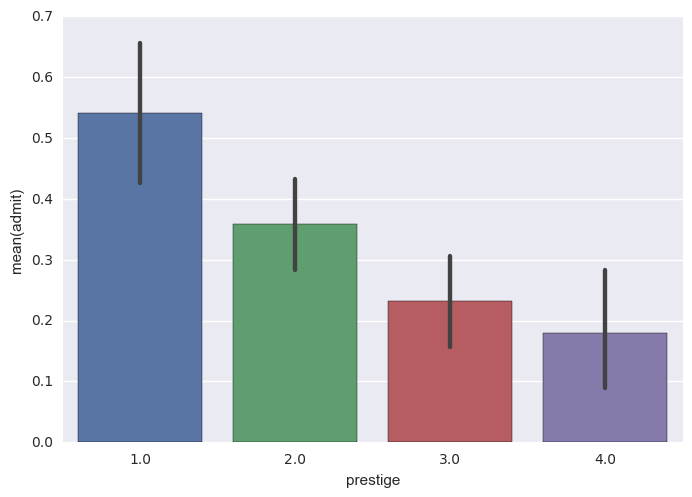

In [51]:
import seaborn as sns
sns.barplot(x=df["prestige"], y=df.admit)

In [46]:
df.groupby(["prestige", "admit"])

#### Question 14. What is your hypothesis? 

Answer: <br/>
Null Hypothesis : $H_0 = 0$ : Prestige does not correlate with and grad school admissions rates
<br/>
Alternative Hypothesis : $H_1  != 0$ : prestige does have an effect on grad school admissions rates 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [70]:
print "GRE null indicies",np.where(df_raw['gre'].isnull())[0]
print "GPA null indicies", np.where(df_raw['gpa'].isnull())[0]

GRE null indicies [187 212]
GPA null indicies [187 236]


In [71]:
print df_raw[df_raw.index == 187]
print df_raw[df_raw.index == 212]
print df_raw[df_raw.index == 236]

     admit  gre  gpa  prestige
187      0  NaN  NaN       2.0
     admit  gre   gpa  prestige
212      0  NaN  2.87       2.0
     admit    gre  gpa  prestige
236      1  660.0  NaN       NaN


why does it matter view index as above or below?

In [38]:
print df_raw.loc[187]
print df_raw.loc[212]
print df_raw.loc[236]

admit       0.0
gre         NaN
gpa         NaN
prestige    2.0
Name: 187, dtype: float64
admit       0.00
gre          NaN
gpa         2.87
prestige    2.00
Name: 212, dtype: float64
admit         1.0
gre         660.0
gpa           NaN
prestige      NaN
Name: 236, dtype: float64


In [76]:
print df_raw.loc[212]
print df_raw.loc[187]
print df_raw.loc[236]

admit       0.00
gre          NaN
gpa         2.87
prestige    2.00
Name: 212, dtype: float64
admit       0.0
gre         NaN
gpa         NaN
prestige    2.0
Name: 187, dtype: float64
admit         1.0
gre         660.0
gpa           NaN
prestige      NaN
Name: 236, dtype: float64


In [65]:
np.where(df_raw['prestige'].isnull())[0]

array([236], dtype=int64)

Could possibly fill in the missing data. Could fill in the missing values with the mean of that column.  Would be best however to just preform the calculations so that it ignores that particular value.  Maybe there is a case where a student didn't actually have a GRE score. Maybe that student was still accepted.  Unlikely, but could be possible. **IF** that is the case then that is something of significance that should not be altered with. 

**Notice** Above there is a incidence where presige and gpa is null yet this hypothtical person was still admitted!<br/>

In order to handle the missing data, have to first determine the possible reasons why it might be missing. If data is missing at random, then the data can approximated and "filed-in" by assuming the model formed by the regression model of the variables.  Futher care should also be taken in consulting other similar studies and contextual cultural assumptions before automatically filling in the missing data. <br/>

Simply removing the null values by method of removing the entire row, or column even is the least recommended method for this throws away data.  This can also increase error by reducing the quantity of records and may introduce bias. 

https://www.oreilly.com/learning/handling-missing-data

#### 2. Bonus: Log transform the skewed data

In [10]:
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [12]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [39]:
a = df.groupby("prestige").size()
print a

prestige
1.0     61
2.0    148
3.0    121
4.0     67
dtype: int64


In [46]:
# df.groupby(["prestige","admit"]).size() 
b = df.groupby(["prestige", "admit"]).size()
print b
b.dtypes

prestige  admit
1.0       0        28
          1        33
2.0       0        95
          1        53
3.0       0        93
          1        28
4.0       0        55
          1        12
dtype: int64


dtype('int64')

numpy.log¶

numpy.log(x[, out]) = <ufunc 'log'>

    Natural logarithm, element-wise.

    The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. The natural logarithm is logarithm in base e.
    Parameters:	

    x : array_like

        Input value.

    Returns:	

    y : ndarray

        The natural logarithm of x, element-wise.

In [59]:
logPrestige = df.prestige
df["prestigeLog"] = np.log(logPrestige)

C:\Users\Amber\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [61]:
logGre = df.gre
df["greLog"] = np.log(logGre)

C:\Users\Amber\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [62]:
logGpa = df.gpa
df["gpaLog"] = np.log(logGpa)

C:\Users\Amber\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [63]:
df.head()

,admit,gre,gpa,prestige,prestigeLog,greLog,gpaLog
0,0,380.0,3.61,3.0,1.098612,5.940171,1.283708
1,1,660.0,3.67,3.0,1.098612,6.492240,1.300192
2,1,800.0,4.00,1.0,0.000000,6.684612,1.386294
3,1,640.0,3.19,4.0,1.386294,6.461468,1.160021
4,0,520.0,2.93,4.0,1.386294,6.253829,1.075002


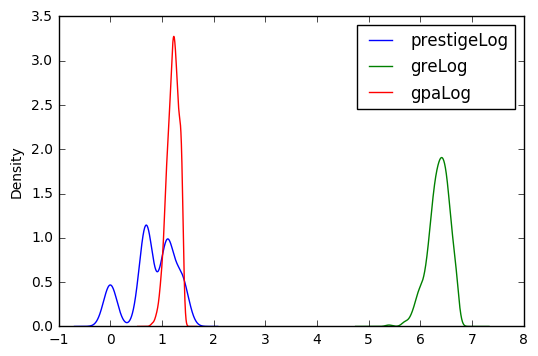

In [67]:
Logs = df[["prestigeLog", "greLog", "gpaLog"]]

plt.figure()
Logs.plot.kde()

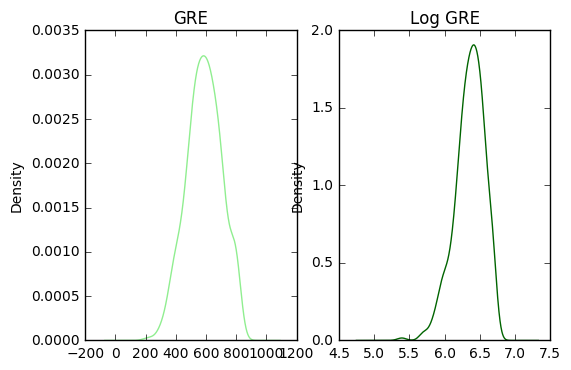

In [88]:
    plt.figure()

    fig,axs = plt.subplots(1,2, sharey= False)

    df.gre.plot.kde(ax = axs [0], title = "GRE", color = "lightgreen")
    df.greLog.plot.kde(ax = axs [1], title = "Log GRE", color = "darkgreen")

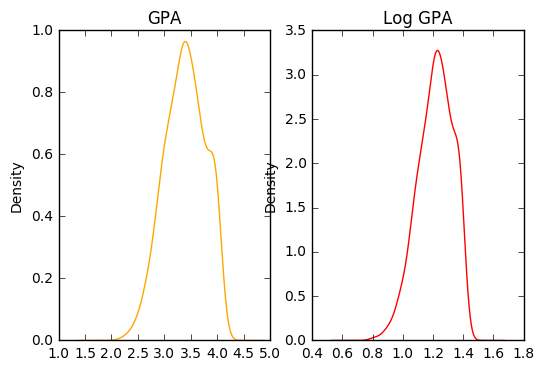

In [94]:
plt.figure()

fig,axs = plt.subplots(1,2, sharey= False)

df.gpa.plot.kde(ax = axs [0], title = "GPA", color = "orange")
df.gpaLog.plot.kde(ax = axs [1], title = "Log GPA", color = "red")

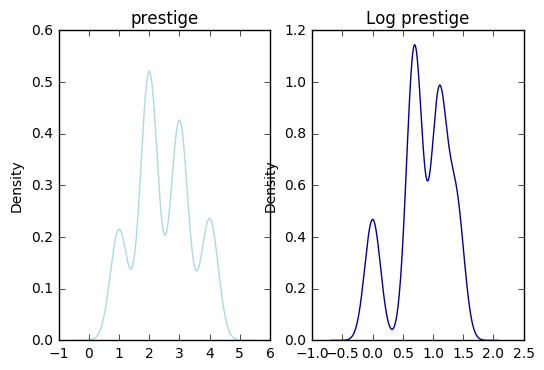

In [95]:
plt.figure()

fig,axs = plt.subplots(1,2, sharey= False)

df.prestige.plot.kde(ax = axs [0], title = "prestige", color = "lightblue")
df.prestigeLog.plot.kde(ax = axs [1], title = "Log prestige", color = "darkblue")

In [49]:
np.log(4)

1.3862943611198906

#### 3. Advanced: Impute missing data

http://www.stat.columbia.edu/~gelman/arm/missing.pdf 

http://www.dummies.com/programming/big-data/data-science/data-science-how-to-deal-with-missing-data-in-python/